In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('calories.csv')

# Preview dataset
print(df.head())

# Encode categorical features (Gender)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Define features and target variable
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

# Split dataset into training and validation (test) sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.1, random_state=22)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize and train RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on training and validation data
train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)

# Evaluation using Mean Absolute Error (MAE)
print("RandomForestRegressor Performance")
print(f"Training Error (MAE): {mean_absolute_error(y_train, train_preds):.4f}")
print(f"Validation Error (MAE): {mean_absolute_error(y_val, val_preds):.4f}")

print(f"Training R-squared: {r2_score(y_train, train_preds):.4f}")
print(f"Validation R-squared: {r2_score(y_val, val_preds):.4f}")


    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
RandomForestRegressor Performance
Training Error (MAE): 0.6409
Validation Error (MAE): 1.6109
Training R-squared: 0.9997
Validation R-squared: 0.9982


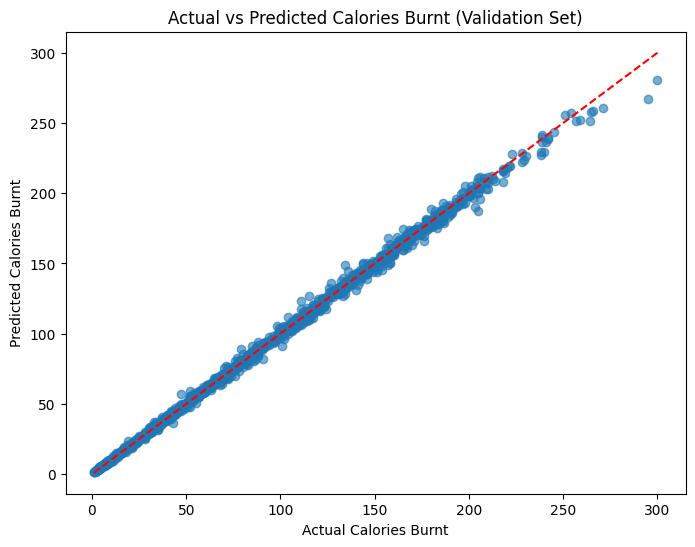

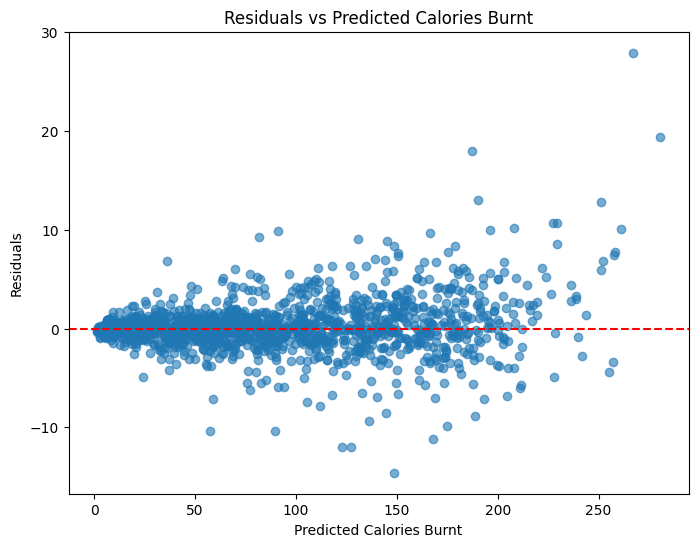

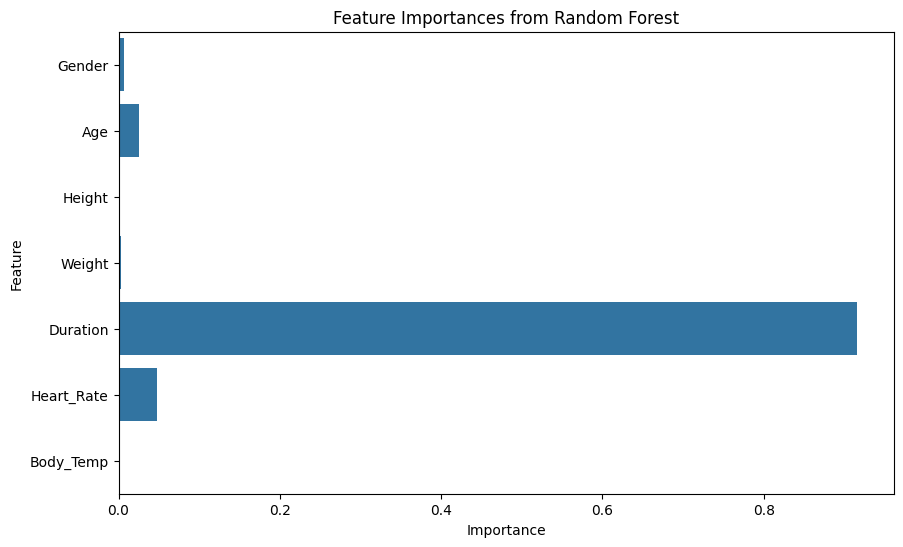

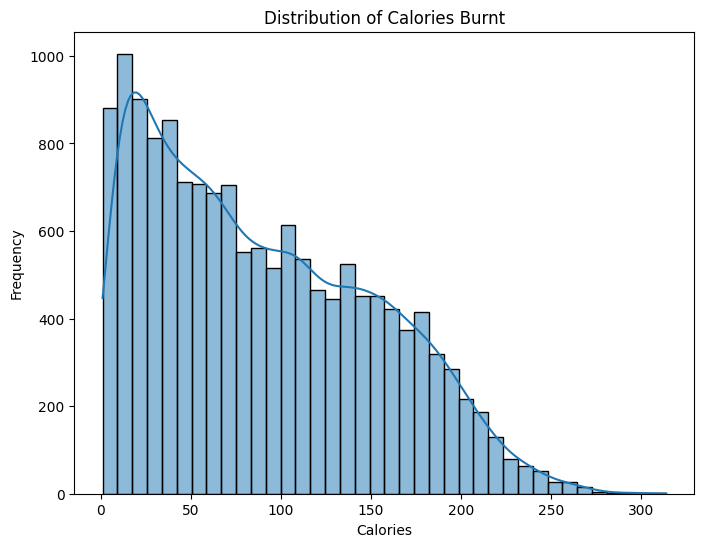

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

# 1. Actual vs Predicted calories plot (validation set)
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_preds, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # diagonal line
plt.xlabel('Actual Calories Burnt')
plt.ylabel('Predicted Calories Burnt')
plt.title('Actual vs Predicted Calories Burnt (Validation Set)')
plt.show()

# 2. Residual plot (validation set)
residuals = y_val - val_preds
plt.figure(figsize=(8, 6))
plt.scatter(val_preds, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Calories Burnt')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Calories Burnt')
plt.show()

# 3. Feature importance plot from the Random Forest
importances = rf.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
sb.barplot(x=importances, y=feature_names)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 4. Distribution of calories burnt (target variable)
plt.figure(figsize=(8, 6))
sb.histplot(df['Calories'], kde=True)
plt.title('Distribution of Calories Burnt')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()
